# Student Performance Indicator:

Life cycle of Machine learning Project

Understanding the Problem Statement

Data Collection

Data Checks to perform

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model

**1) Problem statement:**

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

**2) Data Collection:**

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
#2.1 Import Data and Required Packages
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# 3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [5]:
#3.1 Check Missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#3.2 Check Duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#3.5 Check statistics of data set

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

From above description of numerical data, all means are very close to each other - between 66 and 68.05;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [10]:
print("Categories in 'gender' variable:     ",end="" )
print(df['gender'].unique())


print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [11]:
#defining of numerical and categorical columns
numeric_features =[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features: {}'.format(len(numeric_features ),numeric_features ))
print('we have {} ctegorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 ctegorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
#3.8 Adding columns for "Total Score" and "Average"

df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=df[df['reading_score']==100]['gender'].count()
writing_full=df[df['writing_score']==100]['gender'].count()
math_full = df[df['math_score'] == 100]['average'].count()


print('Number of students with marks in Maths: {}'.format(math_full))
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**

1.From above values we get students have performed the worst in Maths

2.Best performance is in reading section

## 4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

<Axes: xlabel='average', ylabel='Count'>

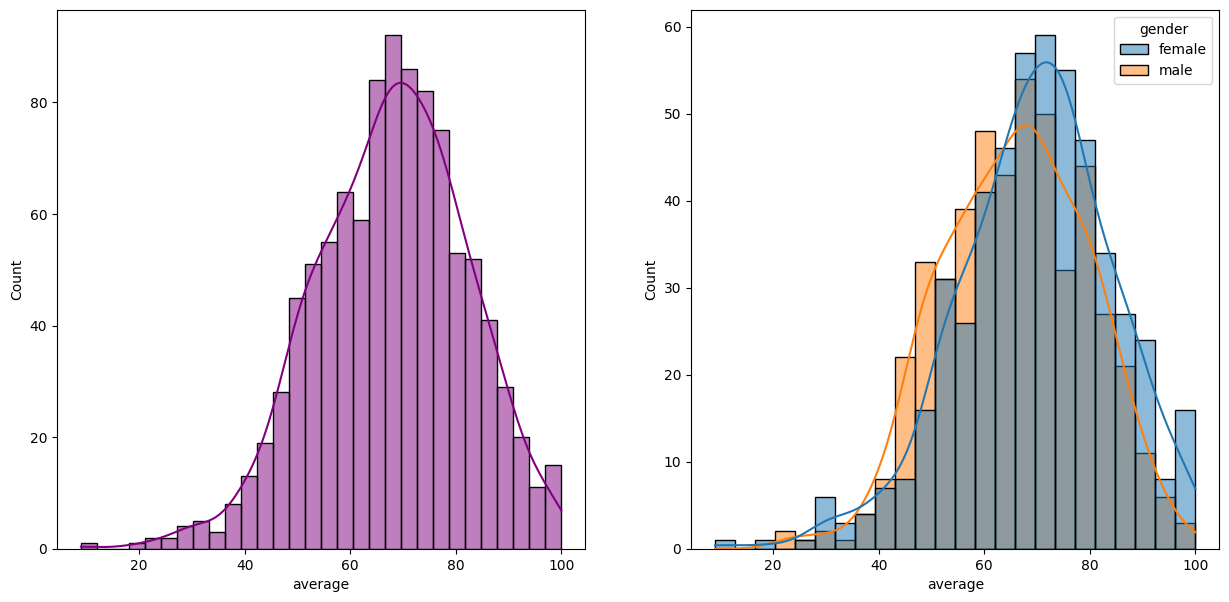

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='purple')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

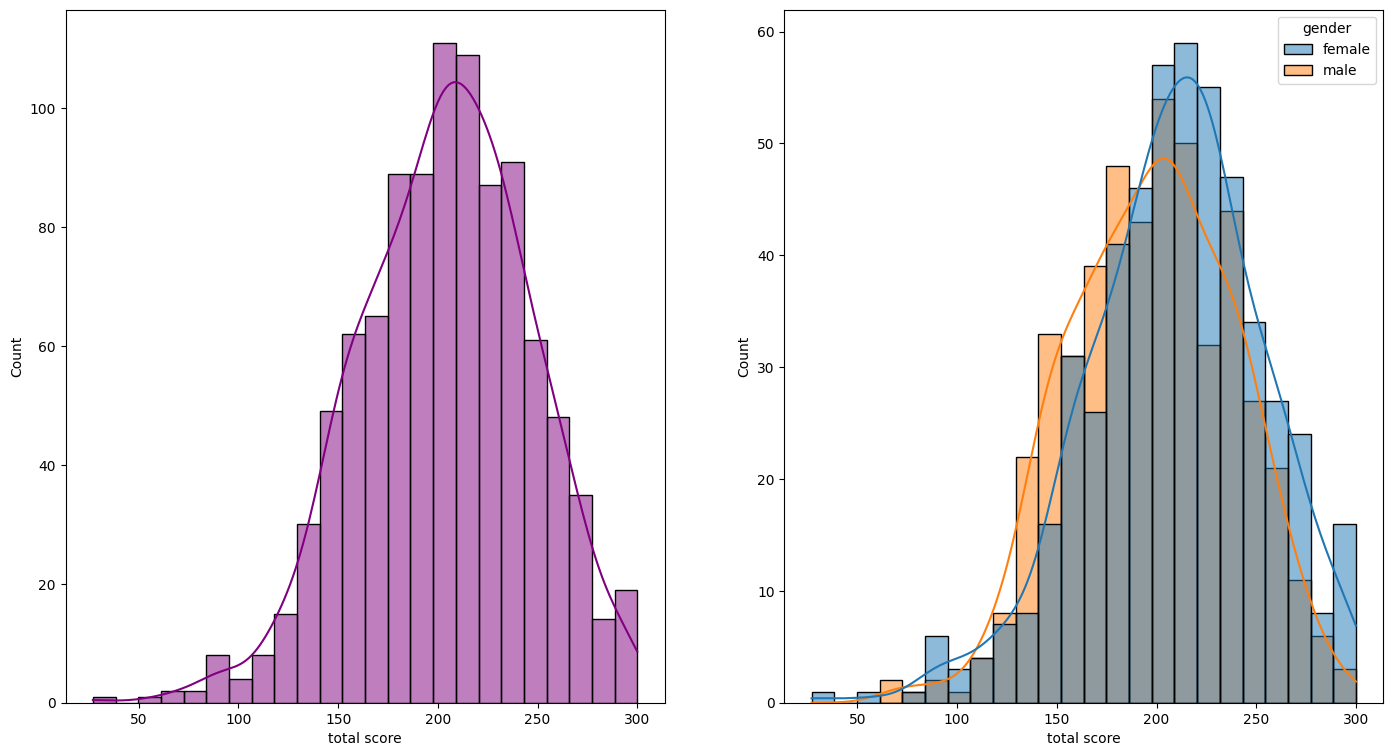

In [ ]:
fig,axis = plt.subplots(1,2,figsize=(17,9))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True,color='purple')
plt.subplot(122)
sns.histplot(data=df,x='total score',hue='gender',kde=True)

### Insights 

- Female students tend to perform well than male students.

[Text(0.5, 1.0, 'MALE')]

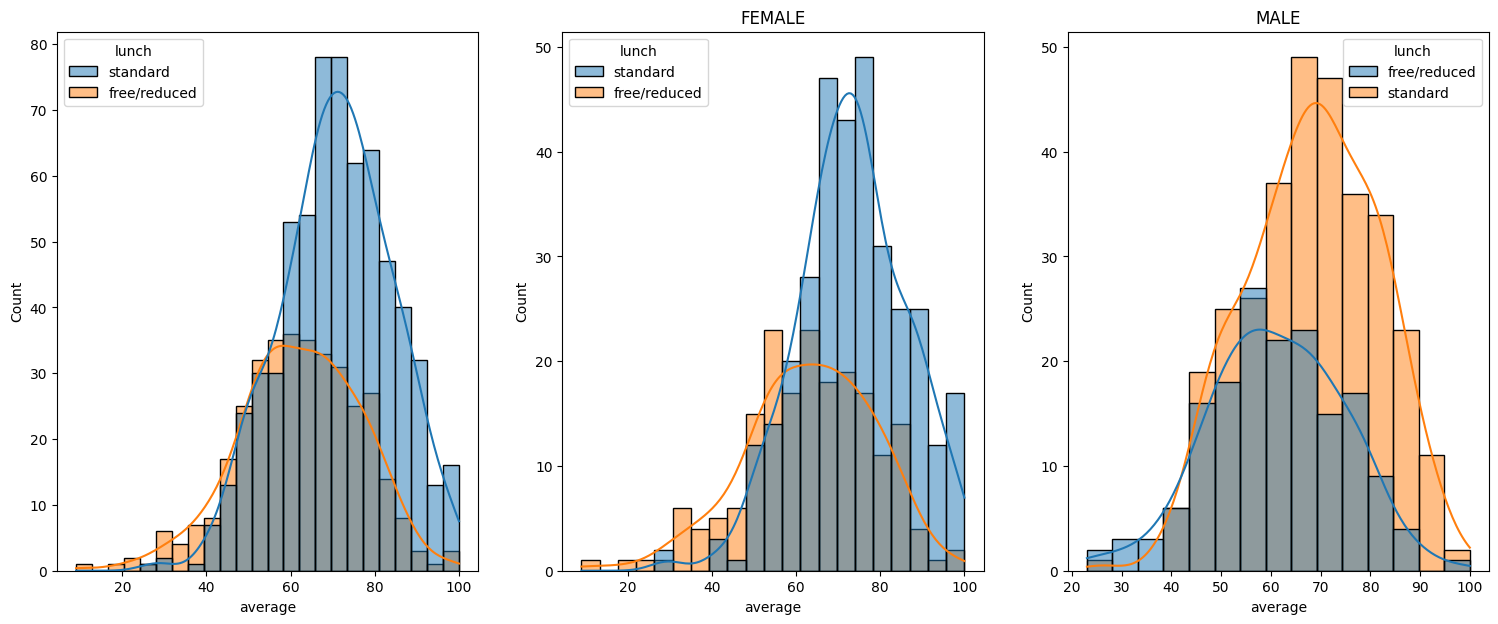

In [ ]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch').set(title='FEMALE')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch').set(title='MALE')


### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

### 4.2 Maximumum score of students in all three subjects

- Violin plots are similar to box plots, except that they also show  the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots. Overlaid on this box plot is a kernel density estimation. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories". 

- A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

[Text(0.5, 1.0, 'WRITING_SCORE')]

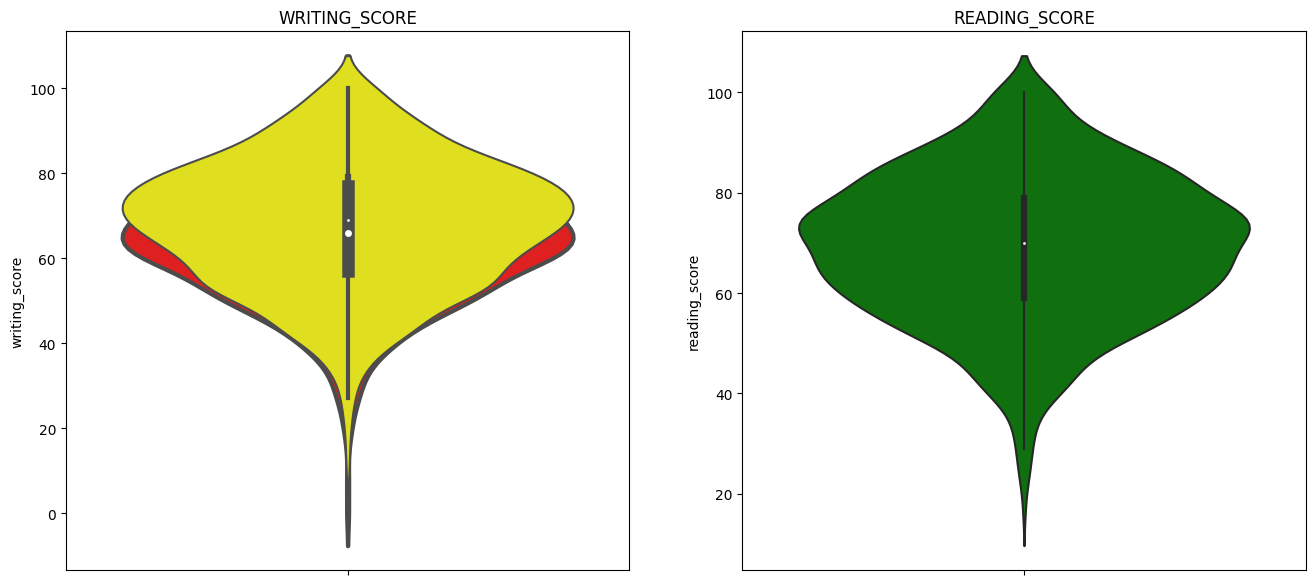

In [33]:
plt.subplots(1,3,figsize=(16,7))
plt.subplot(121)
sns.violinplot(y='math_score',data=df,color='red',linewidth=3).set(title='MATH_SCORE')
plt.subplot(122)
sns.violinplot(y='reading_score',data=df,color='g').set(title='READING_SCORE')
plt.subplot(121)
sns.violinplot(y='writing_score',data=df,color='yellow').set(title='WRITING_SCORE')

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

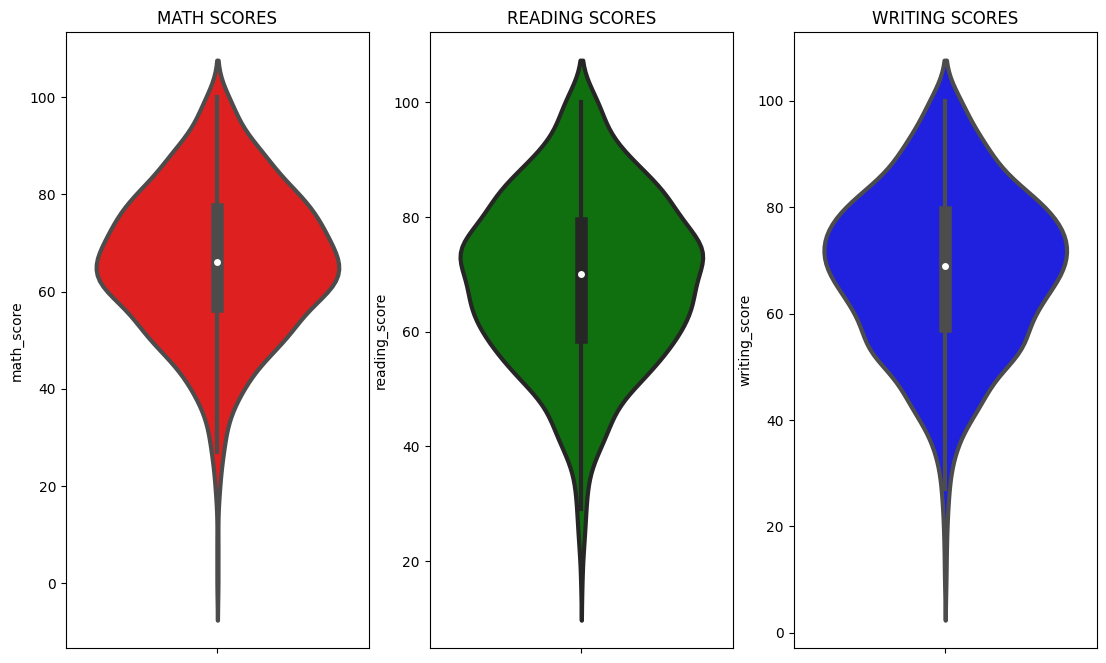

In [35]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

In [3]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'